<a href="https://colab.research.google.com/github/rawa-elargab/Air-Quality-Trends/blob/main/Unveiling_Air_Quality_Trends_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Smog City Diaries: Unveiling Air Quality Trends

Air Quality Index - Brief Description

Air Quality Index is a tool for effective communication of air quality status to people
in terms, which are easy to understand. It transforms complex air quality data of
various pollutants into a single number (index value), nomenclature and colour.
The various AQI categories are decided based on ambient concentration values of air pollutants and their likely health impacts (known as health breakpoints). AQ sub-index and health breakpoints are evolved for multiple pollutants such as PM10, NO2, SO2, CO, etc.
Based on the measured ambient concentrations of a pollutant, sub-index is
calculated, which is a linear function of concentration. The worst sub-index determines the overall AQI.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('/content/AQI_Bangalore_Jan-May_2023.csv')
df = df.drop('Unnamed: 0', axis=1)

df.head()

,Date,NO2(ug/m3),SO2(ug/m3),CO(mg/m3),PM10(ug/m3),TEMP(degreeC),HR(%),WS(m/s),WD(degree),SR(W/m2),AQI
0,2023-01-01,36.9,5.0,0.53,134.6,29.4,77.7,0.65,147.4,285.1,62.893254
1,2023-01-02,36.5,3.5,0.28,91.4,30.7,58.4,0.55,160.9,168.0,74.124968
2,2023-01-03,28.7,2.1,0.60,55.8,24.1,45.1,0.86,277.1,274.1,74.632000
3,2023-01-04,17.2,6.8,0.30,116.3,24.9,52.7,0.40,180.9,255.6,109.132437
4,2023-01-05,23.1,7.0,0.16,46.1,33.6,29.2,0.10,231.2,280.7,144.292485


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           135 non-null    object 
 1   NO2(ug/m3)     135 non-null    float64
 2   SO2(ug/m3)     135 non-null    float64
 3   CO(mg/m3)      135 non-null    float64
 4   PM10(ug/m3)    135 non-null    float64
 5   TEMP(degreeC)  135 non-null    float64
 6   HR(%)          135 non-null    float64
 7   WS(m/s)        135 non-null    float64
 8   WD(degree)     135 non-null    float64
 9   SR(W/m2)       135 non-null    float64
 10  AQI            135 non-null    float64
dtypes: float64(10), object(1)
memory usage: 11.7+ KB


In [4]:
df.describe()

,NO2(ug/m3),SO2(ug/m3),CO(mg/m3),PM10(ug/m3),TEMP(degreeC),HR(%),WS(m/s),WD(degree),SR(W/m2),AQI
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,27.519259,5.014074,0.578741,94.600000,28.905926,51.394815,0.517704,190.642222,229.654074,97.819335
std,7.102548,1.817829,0.257457,26.679698,3.090012,15.603087,0.256451,55.787596,75.095175,29.749252
min,16.000000,2.000000,0.010000,45.500000,24.000000,25.100000,0.100000,103.400000,88.600000,44.200000
25%,21.200000,3.350000,0.360000,75.750000,26.300000,37.150000,0.325000,142.950000,168.950000,72.962484
50%,28.100000,5.000000,0.610000,94.900000,28.800000,51.600000,0.500000,191.300000,236.600000,99.169800
75%,33.800000,6.700000,0.790000,116.950000,31.600000,62.700000,0.760000,236.000000,285.800000,116.366316
max,39.800000,7.900000,0.990000,139.300000,33.900000,80.800000,0.990000,282.500000,349.600000,151.741200


###Data Cleaning & Preprocessing

In [5]:
df.isnull().sum()

Date             0
NO2(ug/m3)       0
SO2(ug/m3)       0
CO(mg/m3)        0
PM10(ug/m3)      0
TEMP(degreeC)    0
HR(%)            0
WS(m/s)          0
WD(degree)       0
SR(W/m2)         0
AQI              0
dtype: int64

In [6]:
df.dtypes

Date              object
NO2(ug/m3)       float64
SO2(ug/m3)       float64
CO(mg/m3)        float64
PM10(ug/m3)      float64
TEMP(degreeC)    float64
HR(%)            float64
WS(m/s)          float64
WD(degree)       float64
SR(W/m2)         float64
AQI              float64
dtype: object

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Check for and handle outliers or erroneous data points
z_scores = (df['PM10(ug/m3)'] - df['PM10(ug/m3)'].mean()) / df['PM10(ug/m3)'].std()
threshold = 3  
df = df[z_scores.abs() < threshold]

###Statistical Analysis

In [9]:
mean_values = df.mean()
median_values = df.median()
std_values = df.std()

<ipython-input-9-95134a21269f>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_values = df.mean()
<ipython-input-9-95134a21269f>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  median_values = df.median()


In [10]:
print("Mean: ")
print(mean_values)

print("\nMedian: ")
print(median_values)

print("nStandard Deviation: ")
print(std_values)

Mean: 
NO2(ug/m3)        27.519259
SO2(ug/m3)         5.014074
CO(mg/m3)          0.578741
PM10(ug/m3)       94.600000
TEMP(degreeC)     28.905926
HR(%)             51.394815
WS(m/s)            0.517704
WD(degree)       190.642222
SR(W/m2)         229.654074
AQI               97.819335
dtype: float64

Median: 
NO2(ug/m3)        28.1000
SO2(ug/m3)         5.0000
CO(mg/m3)          0.6100
PM10(ug/m3)       94.9000
TEMP(degreeC)     28.8000
HR(%)             51.6000
WS(m/s)            0.5000
WD(degree)       191.3000
SR(W/m2)         236.6000
AQI               99.1698
dtype: float64
nStandard Deviation: 
Date             39 days 19:49:01.761820273
NO2(ug/m3)                         7.102548
SO2(ug/m3)                         1.817829
CO(mg/m3)                          0.257457
PM10(ug/m3)                       26.679698
TEMP(degreeC)                      3.090012
HR(%)                             15.603087
WS(m/s)                            0.256451
WD(degree)                        55.78

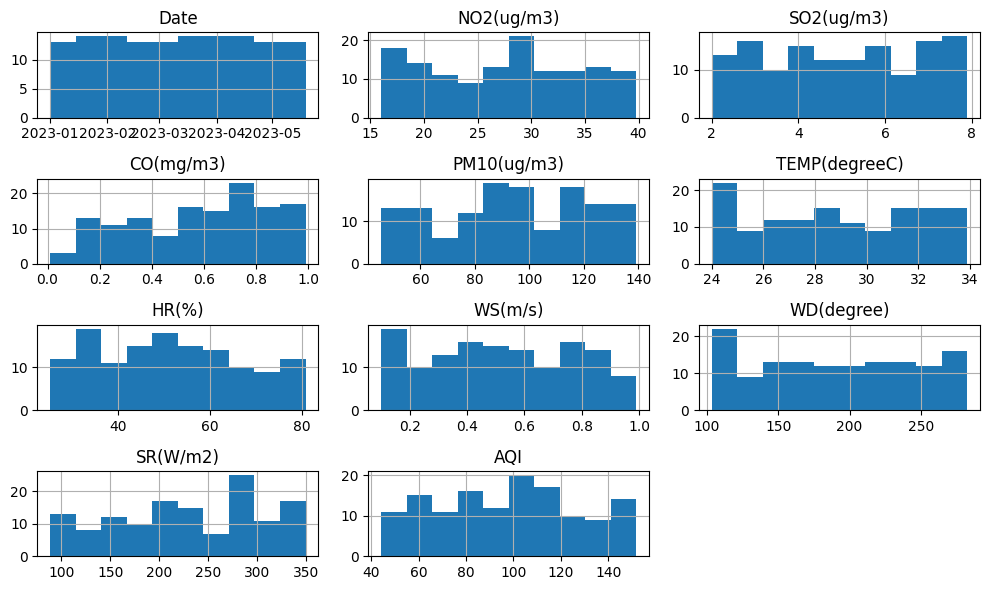

In [11]:
# Investigate the distribution using histograms
df.hist(figsize=(10, 6))     # Plot histograms for each numerical feature
plt.tight_layout()           
plt.show()

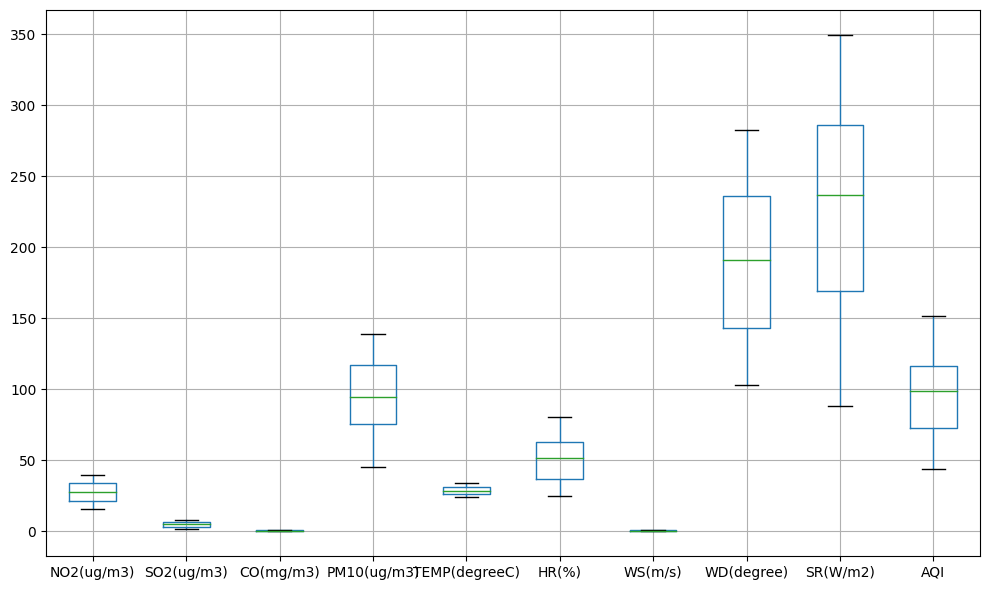

In [12]:
# Investigate the distribution using box plots
df.boxplot(figsize=(10, 6))  # Plot box plots for each numerical feature
plt.tight_layout()          
plt.show()  

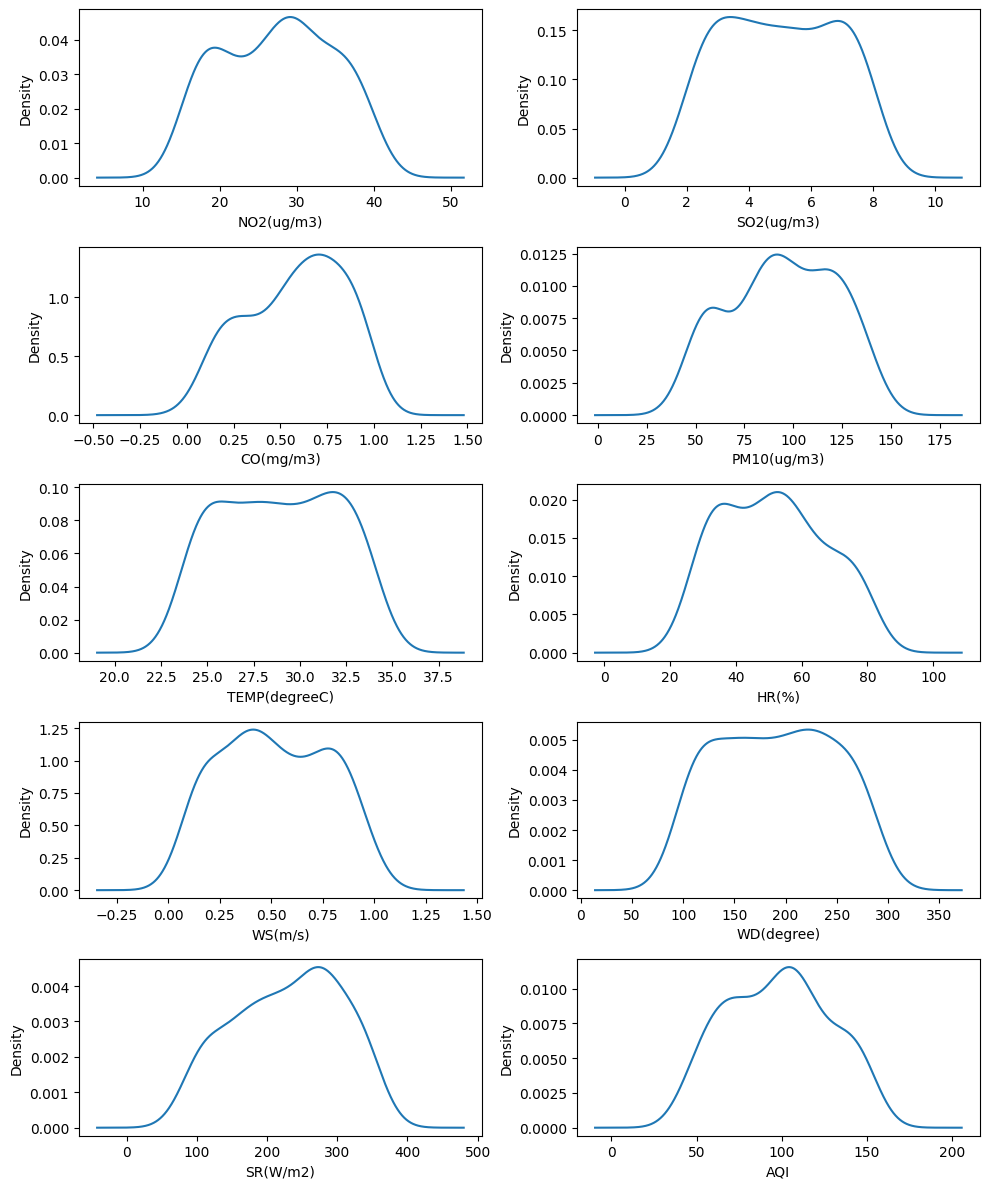

In [13]:
# Exclude non-numeric columns and the 'Date' column
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Investigate the distribution using density plots
num_features = len(numeric_cols)  # Count the number of numerical features
num_rows = (num_features + 1) // 2  # Calculate the number of rows for the layout
num_cols = 2  # Set the number of columns for the layout

plt.figure(figsize=(10, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i+1)
    df[col].plot(kind='density')
    plt.xlabel(col)

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()

###Analyze Temporal Patterns

In [14]:
# Extract temporal features
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Hour'] = df['Date'].dt.hour

In [15]:
# Visualize temporal patterns
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'AQI over Time')

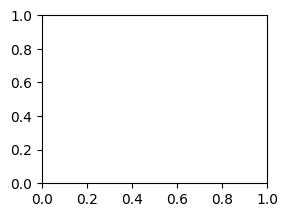

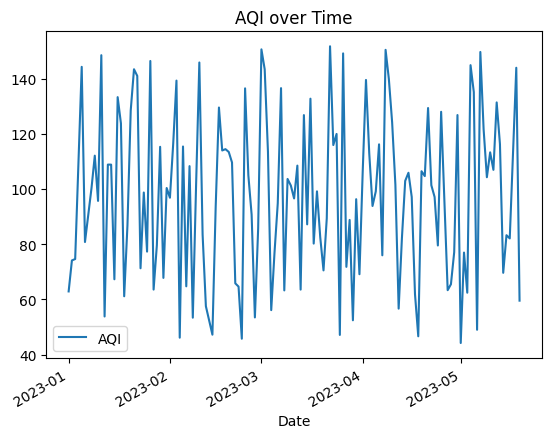

In [16]:
# Line plot of AQI over time
plt.subplot(2, 2, 1)
df.plot(x='Date', y='AQI', kind='line')
plt.title('AQI over Time')

Text(0.5, 1.0, 'Average AQI by Month')

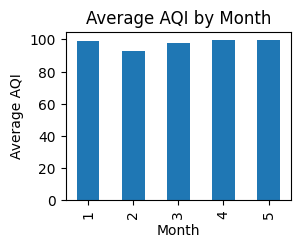

In [17]:
# Bar plot of average AQI by month
plt.subplot(2, 2, 2)
df.groupby('Month')['AQI'].mean().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.title('Average AQI by Month')

([<matplotlib.axis.XTick at 0x7f5dd2c2a890>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

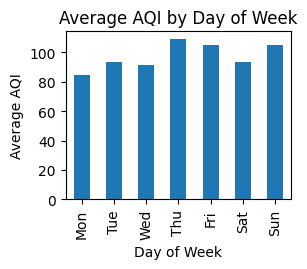

In [18]:
#Bar plot of average AQI by day of the week
plt.subplot(2,2,3)
df.groupby('DayOfWeek')['AQI'].mean().plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Average AQI')
plt.title('Average AQI by Day of Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


###Exploring relationships between variables

In [19]:
df.columns

Index(['Date', 'NO2(ug/m3)', 'SO2(ug/m3)', 'CO(mg/m3)', 'PM10(ug/m3)',
       'TEMP(degreeC)', 'HR(%)', 'WS(m/s)', 'WD(degree)', 'SR(W/m2)', 'AQI',
       'Month', 'DayOfWeek', 'Hour'],
      dtype='object')

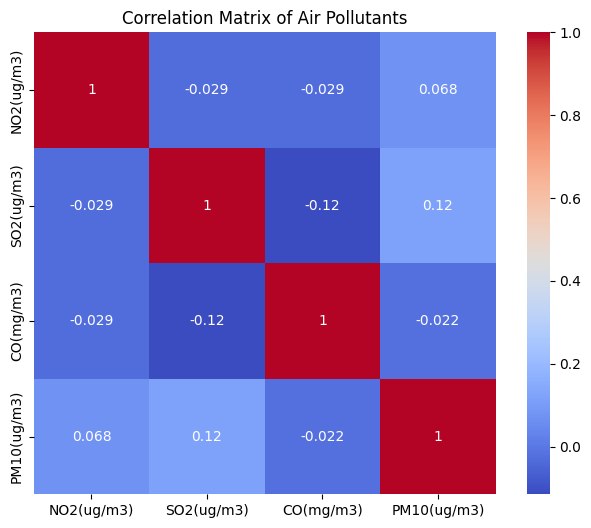

In [20]:
# Correlation matrix of air pollutants
air_pollutants = ['NO2(ug/m3)', 'SO2(ug/m3)', 'CO(mg/m3)', 'PM10(ug/m3)']
air_pollutants_df = df[air_pollutants]
correlation_matrix = air_pollutants_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Air Pollutants')
plt.show()

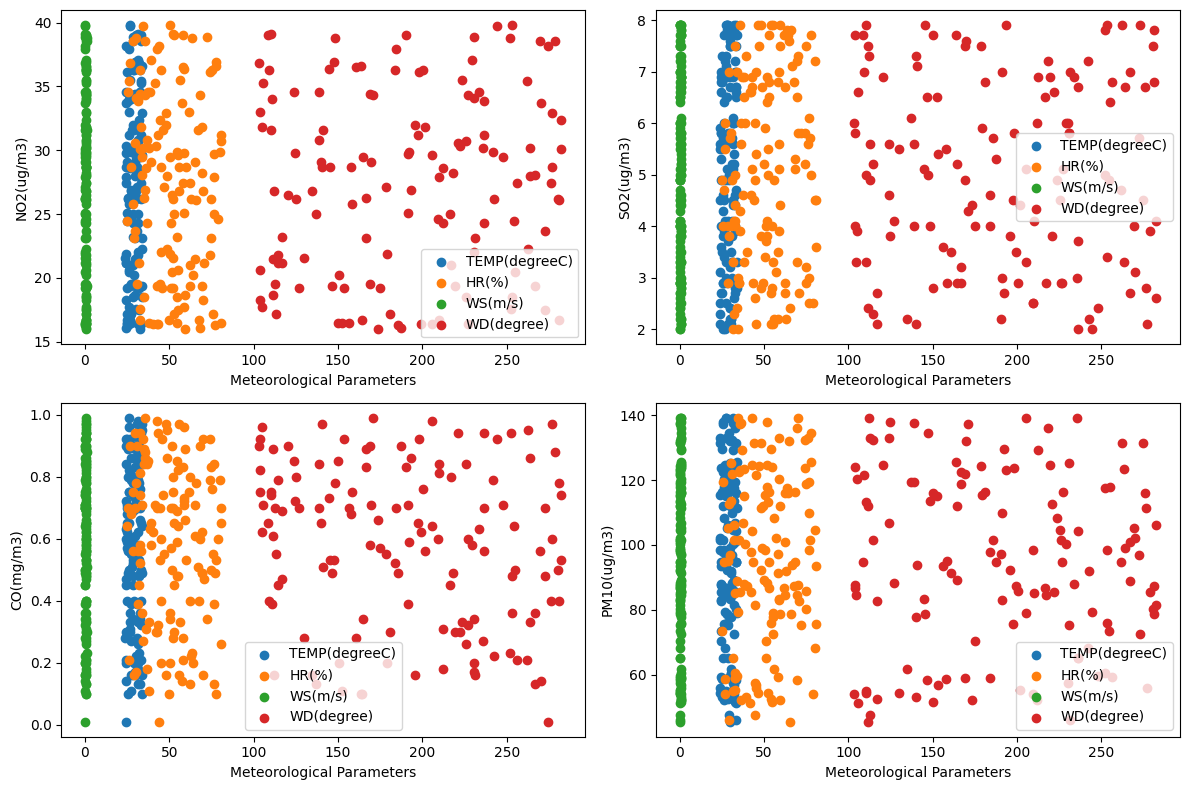

In [21]:
# Scatter plots of air pollutants vs. meteorological parameters
meteorological_parameters = ['TEMP(degreeC)', 'HR(%)', 'WS(m/s)', 'WD(degree)']
plt.figure(figsize=(12, 8))

for i, pollutant in enumerate(air_pollutants):
    plt.subplot(2, 2, i+1)
    for parameter in meteorological_parameters:
        plt.scatter(df[parameter], df[pollutant], label=parameter)
    plt.xlabel('Meteorological Parameters')
    plt.ylabel(pollutant)
    plt.legend()

plt.tight_layout()
plt.show()

Visualizing our data

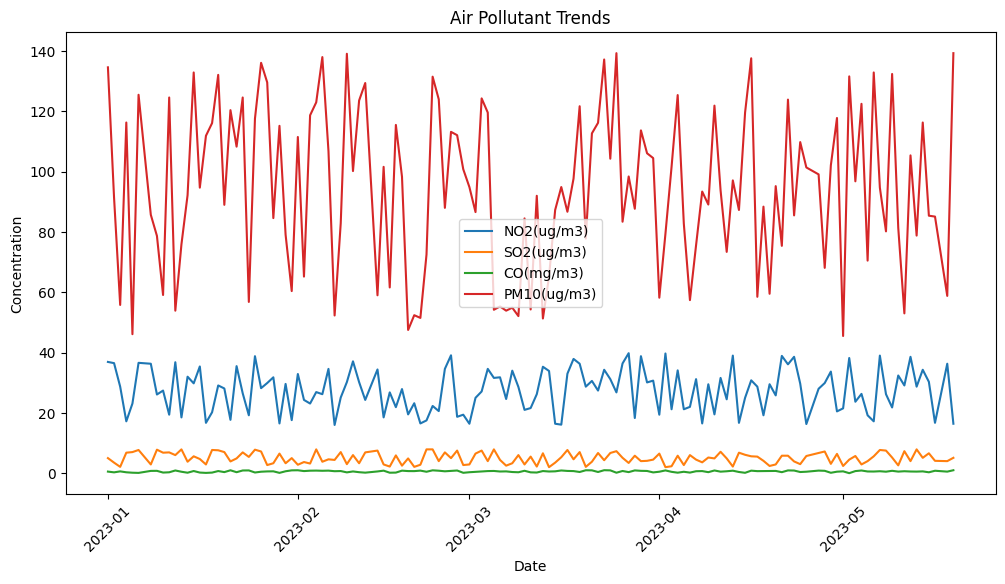

In [24]:
# Line plot of air pollutants over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='NO2(ug/m3)', data=df, label='NO2(ug/m3)')
sns.lineplot(x='Date', y='SO2(ug/m3)', data=df, label='SO2(ug/m3)')
sns.lineplot(x='Date', y='CO(mg/m3)', data=df, label='CO(mg/m3)')
sns.lineplot(x='Date', y='PM10(ug/m3)', data=df, label='PM10(ug/m3)')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.title('Air Pollutant Trends')
plt.legend()
plt.xticks(rotation=45)
plt.show()

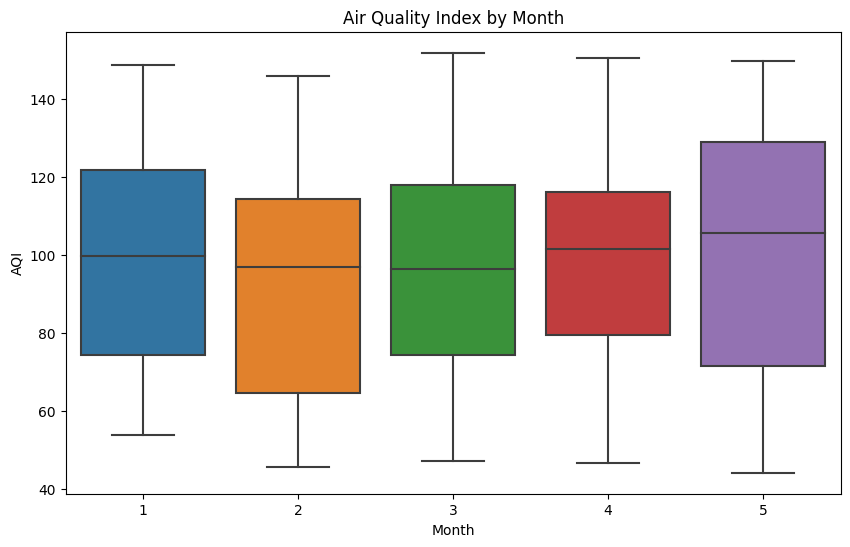

In [25]:
# Box plot of air pollutants by month
df['Month'] = df['Date'].dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='AQI', data=df)
plt.xlabel('Month')
plt.ylabel('AQI')
plt.title('Air Quality Index by Month')
plt.show()

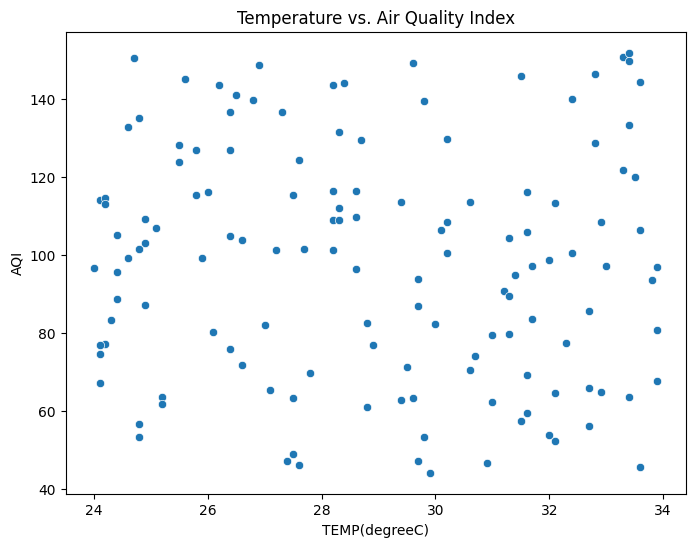

In [26]:
# Scatter plot of temperature vs. AQI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TEMP(degreeC)', y='AQI', data=df)
plt.xlabel('TEMP(degreeC)')
plt.ylabel('AQI')
plt.title('Temperature vs. Air Quality Index')
plt.show()


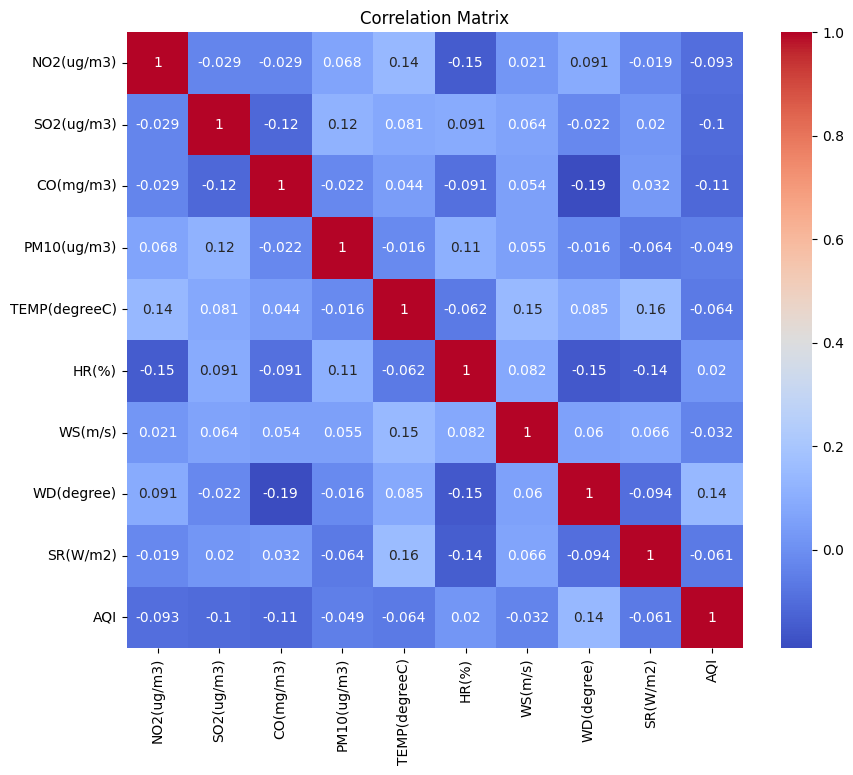

In [27]:
# Heatmap of correlation matrix
correlation_matrix = df[['NO2(ug/m3)', 'SO2(ug/m3)', 'CO(mg/m3)', 'PM10(ug/m3)',
       'TEMP(degreeC)', 'HR(%)', 'WS(m/s)', 'WD(degree)', 'SR(W/m2)', 'AQI']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

###Regression Analysis

In [28]:
import statsmodels.api as sm

####Simple regression

In [29]:
# Select the relevant columns for regression analysis
columns_of_interest = ['NO2(ug/m3)', 'SO2(ug/m3)', 'CO(mg/m3)', 'PM10(ug/m3)', 'TEMP(degreeC)', 'HR(%)', 'WS(m/s)', 'WD(degree)']
df_regression = df[columns_of_interest].copy()

In [30]:
# Separate the independent variables (meteorological parameters) and dependent variables (air pollutants)
X = df_regression[['TEMP(degreeC)', 'HR(%)', 'WS(m/s)', 'WD(degree)']]
y_NO2 = df_regression['NO2(ug/m3)']
y_SO2 = df_regression['SO2(ug/m3)']
y_CO = df_regression['CO(mg/m3)']
y_PM10 = df_regression['PM10(ug/m3)']

# Add a constant term to the independent variables
X = sm.add_constant(X)

In [31]:
# Perform multiple linear regression for each air pollutant
model_NO2 = sm.OLS(y_NO2, X).fit()
model_SO2 = sm.OLS(y_SO2, X).fit()
model_CO = sm.OLS(y_CO, X).fit()
model_PM10 = sm.OLS(y_PM10, X).fit()

In [32]:
# Print the regression summary for each pollutant
print("Regression summary for NO2:")
print(model_NO2.summary())
print("\nRegression summary for SO2:")
print(model_SO2.summary())
print("\nRegression summary for CO:")
print(model_CO.summary())
print("\nRegression summary for PM10:")
print(model_PM10.summary())

Regression summary for NO2:
                            OLS Regression Results                            
Dep. Variable:             NO2(ug/m3)   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.462
Date:                Thu, 25 May 2023   Prob (F-statistic):              0.217
Time:                        20:33:17   Log-Likelihood:                -452.75
No. Observations:                 135   AIC:                             915.5
Df Residuals:                     130   BIC:                             930.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            2

####Mutiple Regression

In [33]:
columns_of_interest = ['AQI','NO2(ug/m3)', 'SO2(ug/m3)', 'CO(mg/m3)', 'PM10(ug/m3)', 'TEMP(degreeC)', 'HR(%)', 'WS(m/s)', 'WD(degree)']
df_regression = df[columns_of_interest].copy()

# Remove any rows with missing values
df_regression.dropna(inplace=True)

# Separate the independent variables (meteorological parameters) and dependent variable (AQI)
X = df_regression[['NO2(ug/m3)', 'SO2(ug/m3)', 'CO(mg/m3)', 'PM10(ug/m3)', 'TEMP(degreeC)', 'HR(%)', 'WS(m/s)', 'WD(degree)']]
y = df_regression['AQI']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Perform multiple linear regression
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9574
Date:                Thu, 25 May 2023   Prob (F-statistic):              0.472
Time:                        20:36:17   Log-Likelihood:                -645.10
No. Observations:                 135   AIC:                             1308.
Df Residuals:                     126   BIC:                             1334.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           124.0807     30.982      4.005